In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from math import sqrt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('C:/Users/Eugene/MachineLearning/adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
columns = data.columns    
print(columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [5]:
data = data.loc[:, : ]
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
data['workclass'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 
                                        'Local-gov':5, 'Without-pay':6, 'Never-worked':7 })

data['income'] = data.income.map({'<=50K':0, '>50K':1})

data['education'] = data.education.map({'HS-grad':0, 'Some-college':1, 'Bachelors':2, 'Masters':3, 
                                        'Assoc-voc':4, '11th':5, 
                                        'Assoc-acdm':6, '10th':7, '7th-8th':8, 'Prof-school':9, 
                                        '9th':10, '12th':11, 'Doctorate':12,
                                        '5th-6th':13, '1st-4th':14, 'Preschool':15 })

data['occupation'] = data.occupation.map({'Prof-specialty':0,'Craft-repair':1,'Exec-managerial':2,
                                          'Adm-clerical':3,'Sales':4, 'Other-service':5, 
                                          'Machine-op-inspct':6,'Transport-moving':7, 
                                         'Handlers-cleaners':8,'Farming-fishing':9, 
                                          'Tech-support':10,  
                                            'Protective-serv':11, 'Priv-house-serv':12, 
                                              'Armed-Forces':13})

data['marital.status'] = data['marital.status'].map({'Married-civ-spouse':0,'Never-married':1,'Divorced':2,                  
                                                'Separated':3, 'Widowed':4, 'Married-spouse-absent':5,
                                                  'Married-AF-spouse':6 })

data['relationship'] = data.relationship.map({'Husband':0, 'Not-in-family':1,'Own-child':2, 
                                                  'Unmarried':3, 'Wife':4, 'Other-relative':4})


data['race'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 
                              'Other':4})

data['sex'] = data.sex.map({'Female':0, 'Male':1})

data['native.country'] = data['native.country'].map({'United-States':0, 'Mexico':1, 'Philippines':2,'Germany':3,'Canada':4,
                            'Puerto-Rico':5,'El-Salvador':6,'India':7,'Cuba':8,'England':9,'Jamaica':10,
                            'South':11,'China':12,'Italy':13,'Dominican-Republic':14,'Vietnam':15,
                            'Guatemala':16,'Japan':17,'Poland':18,'Columbia':19,'Taiwan':20,
                            'Haiti':21,'Iran':22,'Portugal':23,'Nicaragua':24,
                            'Peru':25,'Greece':26,'France':27,'Ecuador':28,'Ireland':29,'Hong':30,
                            'Cambodia':31,'Trinadad&Tobago':32,'Thailand':33,
                            'LaosYugoslavia':34,'Outlying-US(Guam-USVI-etc)':35,
                            'Hungary':36,'Honduras':37,'Scotland':38,'Holand-Netherlands':39})

In [7]:
# How much of your data is missing?
data.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     617
income               0
hours.per.week       0
capital.loss         0
capital.gain         0
sex                  0
race                 0
relationship         0
marital.status       0
education.num        0
education            0
fnlwgt               0
age                  0
dtype: int64

In [8]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,0,9,4,NaN,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,NaN,186061,1,10,4,NaN,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


In [9]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,0,9,4,NaN,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,NaN,186061,1,10,4,NaN,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy="median", axis=0, verbose=0)
data.loc[:,['workclass','occupation','native.country']]=imputer.fit_transform(data.loc[:,['workclass','occupation', 
                                                                                       'native.country']])

In [11]:
data.isnull().sum().sort_values(ascending=False)

income            0
native.country    0
hours.per.week    0
capital.loss      0
capital.gain      0
sex               0
race              0
relationship      0
occupation        0
marital.status    0
education.num     0
education         0
fnlwgt            0
workclass         0
age               0
dtype: int64

In [12]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,0,9,4,3.0,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,0.0,186061,1,10,4,3.0,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


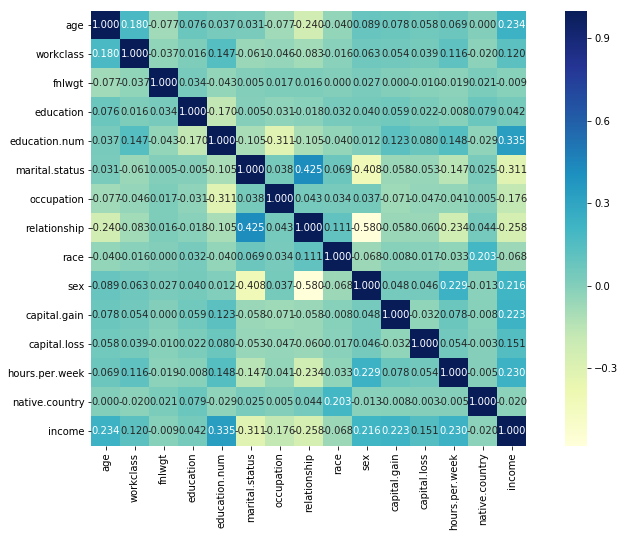

In [13]:
data_columns = list(data.columns)
corr = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= data_columns, yticklabels= data_columns,
           cmap= 'YlGnBu')
plt.savefig('corr_matrix_all_features.png')
plt.show()

In [14]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,0,9,4,3.0,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,0.0,186061,1,10,4,3.0,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


In [15]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [16]:
corr_matrix = data.corr()
corr_matrix["income"].sort_values(ascending=False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
workclass         0.120437
education         0.042449
fnlwgt           -0.009463
native.country   -0.019763
race             -0.067713
occupation       -0.175882
relationship     -0.257986
marital.status   -0.311288
Name: income, dtype: float64

In [17]:
drop = ['fnlwgt', 'education', 'race', 'native.country']
data = data.drop(drop, axis = 1)

In [18]:
columns = data.columns    
print(columns)

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'income'],
      dtype='object')


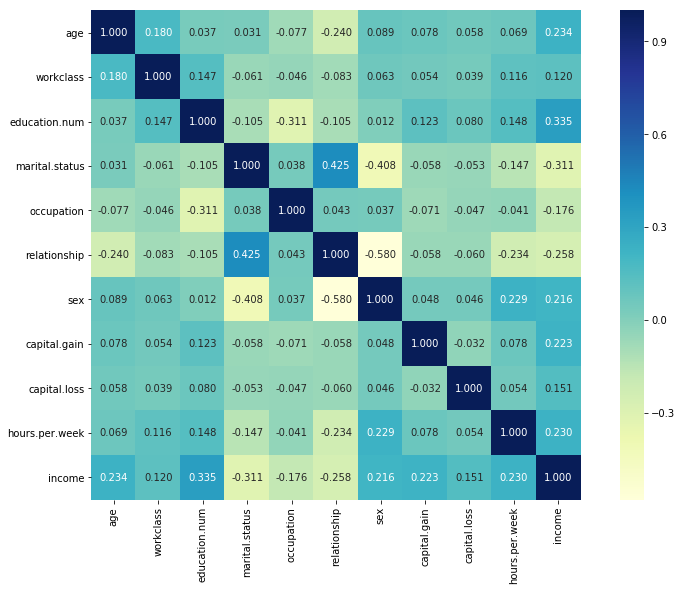

In [19]:
data_columns= list(data.columns)
corr = data.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= data_columns, yticklabels= data_columns,
           cmap= 'YlGnBu')
plt.savefig('corr_matrix_selected_features.png')
plt.show()

In [20]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,0.0,9,4,3.0,1,0,0,4356,40,0
1,82,0.0,9,4,2.0,1,0,0,4356,18,0
2,66,0.0,10,4,3.0,3,0,0,4356,40,0
3,54,0.0,4,2,6.0,3,0,0,3900,40,0
4,41,0.0,10,3,0.0,2,0,0,3900,40,0


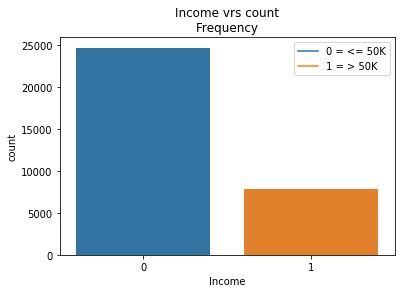

In [21]:
sns.countplot(data["income"])
plt.plot(0, label ="0 = <= 50K")
plt.plot(1, label ="1 = > 50K")
plt.xlabel("Income")
plt.ylabel("count")
plt.title("Income vrs count\nFrequency")
plt.legend()
plt.savefig('frequency_income.png')
plt.show()

In [22]:
data["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [23]:
#from pandas.plotting import scatter_matrix
#scatt = ['age', 'workclass', 'education.num','sex']
#scatter_matrix(data[scatt], figsize=(15,10), color=['blue', 'red'])
#plt.savefig('scatter_plot_age-sex.png')
#plt.show()

In [24]:
#from pandas.plotting import scatter_matrix
#scatt = ['capital.gain', 'capital.loss', 'hours.per.week', 'income']
#scatter_matrix(data[scatt], figsize=(15,10), color= ['blue', 'red'])
#plt.savefig('scatter_plot_capital.gain-income.png')
#plt.show()

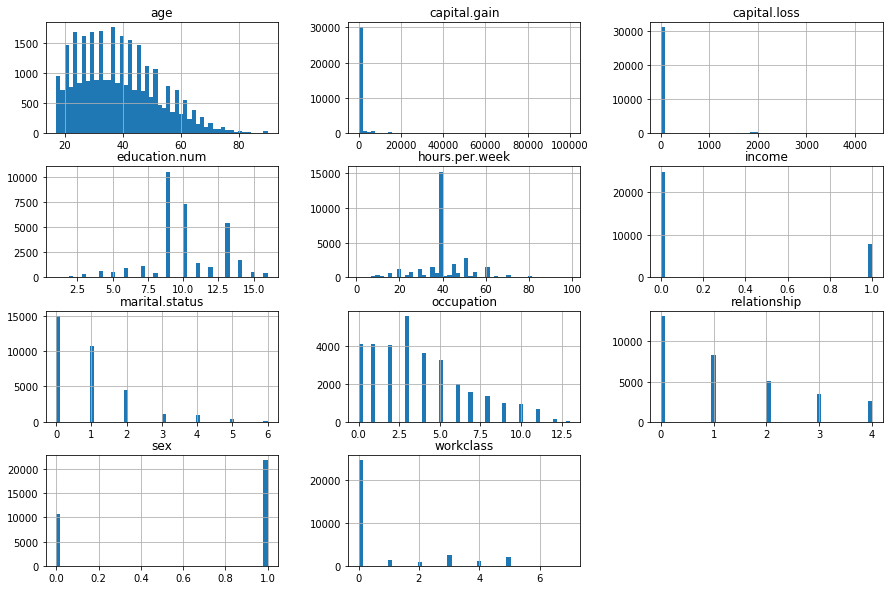

In [25]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,10))
plt.savefig('hist_features.png')
plt.show()

In [26]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,0.0,9,4,3.0,1,0,0,4356,40,0
1,82,0.0,9,4,2.0,1,0,0,4356,18,0
2,66,0.0,10,4,3.0,3,0,0,4356,40,0
3,54,0.0,4,2,6.0,3,0,0,3900,40,0
4,41,0.0,10,3,0.0,2,0,0,3900,40,0


In [27]:
X = data.loc[:,'age': 'hours.per.week']
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week
0,90,0.0,9,4,3.0,1,0,0,4356,40
1,82,0.0,9,4,2.0,1,0,0,4356,18
2,66,0.0,10,4,3.0,3,0,0,4356,40
3,54,0.0,4,2,6.0,3,0,0,3900,40
4,41,0.0,10,3,0.0,2,0,0,3900,40


In [28]:
y = data.loc[:, 'income':]
y.head(5)

,income
0,0
1,0
2,0
3,0
4,0


In [29]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.19601, random_state = 0)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(26178, 10)
(26178, 1)
(6383, 10)
(6383, 1)


## Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=15, random_state=42, min_samples_split=190, 
                                       min_samples_leaf=9)
dt_classifier = dt_classifier.fit(train_X, train_y)

In [32]:
column_features = X.columns

In [33]:
predict_dt_y = dt_classifier.predict(test_X)
#print(predict_dt_y.tolist())

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Decision Tree Accuracy:  {0:.3%}'.format(accuracy_score(test_y, predict_dt_y)))
print("Precision Decision Tree: {0:.3%} ".format(precision_score(test_y, predict_dt_y)))
print ("Recall Decision Tree:    {0:.3%} ".format(recall_score(test_y, predict_dt_y)))
print("F1-Score Decision Tree:  {0:.3%} ".format(f1_score(test_y, predict_dt_y)))

Decision Tree Accuracy:  85.696%
Precision Decision Tree: 73.948% 
Recall Decision Tree:    61.412% 
F1-Score Decision Tree:  67.099% 


In [35]:
#from graphviz import Source
#from sklearn import tree
#graph = Source( tree.export_graphviz(dt_classifier, out_file=None, feature_names=column_features,  rounded=True,
#                    filled=True))
#graph.format = 'png'
#graph.render('d_tree',view=True)

![](d_tree.png)

In [36]:
#print(predict_dt_y.tolist())

In [37]:
#sns.countplot(predict_dt_y)
#plt.plot(0, label ="0.0 = <= 50K")
#plt.plot(1, label ="1.0 = > 50K")
#plt.xlabel("Income")
#plt.ylabel("count")
#plt.title("Predicted income vrs count (Decision Tree) \nFrequency")
#plt.legend()
#plt.savefig('Income_vrs_Count_Decision_Tree_Prediction_Frequency.png')
#plt.show()

In [38]:
"""from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(test_y, predict_dt_y)

from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Decision Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_dt_y)))
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,
            s=cm_dt[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_matrix_Decision_tree.png')
plt.show()"""

"from sklearn.metrics import confusion_matrix\ncm_dt = confusion_matrix(test_y, predict_dt_y)\n\nfrom sklearn.metrics import accuracy_score\nfig, ax = plt.subplots(figsize=(2.5,2.5))\nax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.7)\nax.set_title('Decision Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_dt_y)))\nfor i in range(cm_dt.shape[0]):\n    for j in range(cm_dt.shape[1]):\n        ax.text(x=j, y=i,\n            s=cm_dt[i, j],\n            va='center', ha='center')\nax.set_ylabel('Actual label')\nax.set_xlabel('Predicted label')\nax.xaxis.set_ticks_position('top')\nax.xaxis.set_label_position('top')\nplt.savefig('Confusion_matrix_Decision_tree.png')\nplt.show()"

In [39]:
#from sklearn.metrics import mean_squared_error
#print("Mean squared error Decision Tree: {0:.3%} ".format(mean_squared_error(test_y, predict_dt_y)))
#rootMeanSquaredError_dt= sqrt(mean_squared_error(test_y, predict_dt_y))
#print ("Root mean squared error Decision Tree: {0:.3%} ".format(rootMeanSquaredError_dt/10))

In [40]:
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#fpr_tree, tpr_tree, thresholds = roc_curve(test_y, predict_dt_y)

In [41]:
"""def plot_roc_curve(fpr_tree, tpr_tree, label=None):
    plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve and AUC (Decision Tree)")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_tree, tpr_tree)
plt.savefig('ROC_Curve_Decision_Tree.png')
plt.show()"""

'def plot_roc_curve(fpr_tree, tpr_tree, label=None):\n    plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))\n    plt.legend(loc="lower right", fontsize=16)\n    plt.plot([0, 1], [0, 1], \'k--\')\n    plt.axis([0, 1, 0, 1])\n    plt.title("ROC Curve and AUC (Decision Tree)")\n    plt.xlabel(\'False Positive Rate\', fontsize=16)\n    plt.ylabel(\'True Positive Rate\', fontsize=16)\nplt.figure(figsize=(8, 6))\nplot_roc_curve(fpr_tree, tpr_tree)\nplt.savefig(\'ROC_Curve_Decision_Tree.png\')\nplt.show()'

In [42]:
#from sklearn.svm import SVC
#svm_classifier = SVC(random_state=42, kernel='rbf')
#svm_classifier.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
#Make a prediction
#svm_predict = svm_classifier.predict(test_X)
#svm_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
#Precision and recall, F1-score for SVM
from sklearn.metrics import precision_score, recall_score, f1_score
print('SVM Accuracy:  {0:.3%}'.format(accuracy_score(test_y, svm_predict)))
print("Precision SVM: {0:.3%} ".format(precision_score(test_y, svm_predict)))
print ("Recall SVM:    {0:.3%} ".format(recall_score(test_y, svm_predict)))
print("F1-Score SVM:  {0:.3%} ".format(f1_score(test_y, svm_predict)))

SVM Accuracy:  82.030%
Precision SVM: 71.280% 
Recall SVM:    40.765% 
F1-Score SVM:  51.867% 


![](adult_tree.png)

## Random Forest Model

In [45]:
"""from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, criterion='gini', n_estimators=100, max_depth=5, max_features=4)
rf_classifier = rf_classifier.fit(train_X, train_y)"""

"from sklearn.ensemble import RandomForestClassifier\nrf_classifier = RandomForestClassifier(random_state=42, criterion='gini', n_estimators=100, max_depth=5, max_features=4)\nrf_classifier = rf_classifier.fit(train_X, train_y)"

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(criterion="gini", random_state=42, max_depth=19, n_estimators=200, bootstrap=True,
                                      min_samples_split=18)
rf_classifier = rf_classifier.fit(train_X, train_y)


C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [47]:
predict_rf_y = rf_classifier.predict(test_X)

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Random Forest Tree Accuracy:  {0:.3%}'.format(accuracy_score(test_y, predict_rf_y)))
print("Precision Random Forest: {0:.3%} ".format(precision_score(test_y, predict_rf_y)))
print ("Recall Random Forest:    {0:.3%} ".format(recall_score(test_y, predict_rf_y)))
print("F1-Score Random Forest:  {0:.3%} ".format(f1_score(test_y, predict_rf_y)))

Random Forest Tree Accuracy:  86.339%
Precision Random Forest: 76.923% 
Recall Random Forest:    60.686% 
F1-Score Random Forest:  67.847% 


In [49]:
from sklearn.metrics import classification_report
#print(confusion_matrix(test_y, predict_rf_y))
print(classification_report(test_y, predict_rf_y))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91      4867
          1       0.77      0.61      0.68      1516

avg / total       0.86      0.86      0.86      6383



In [50]:
#print(predict_rf_y.tolist())

### Bagging Classifer

In [51]:
# Training the bagging model and fitting it to the train X and y
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(criterion="gini", max_depth=15,random_state=42, min_samples_split=190, 
                                       min_samples_leaf=9), random_state=42, n_estimators=100)
bag_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=190,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [52]:
# Predict against the test set (Bagging classifier)
predict_bg_y = bag_clf.predict(test_X)
#print(predict_bg_y.tolist())

In [53]:
#Precision and recall, F1-score for Bagging Classifier
from sklearn.metrics import precision_score, recall_score, f1_score

print(('Bagging Classifier Accuracy:  {0:.3%}'.format(accuracy_score(test_y, predict_bg_y))))
print("Precision Bagging Classifier: {0:.3%} ".format(precision_score(test_y, predict_bg_y)))
print ("Recall Bagging Classifier:    {0:.3%} ".format(recall_score(test_y, predict_bg_y)))
print("F1-Score Bagging Classifier:  {0:.3%} ".format(f1_score(test_y, predict_bg_y)))

Bagging Classifier Accuracy:  86.245%
Precision Bagging Classifier: 77.218% 
Recall Bagging Classifier:    59.697% 
F1-Score Bagging Classifier:  67.336% 


In [54]:
#sns.countplot(predict_rf_y)
#plt.plot(0, label ="0.0 = <= 50K")
#plt.plot(1, label ="1.0 = > 50K")
#plt.xlabel("Income")
#plt.ylabel("count")
#plt.title("Random Forest Tree Prediction\n Frequency")
#plt.legend()
#plt.savefig('Income_vrs_Count_Random_Forest_Tree_Prediction.png')
#plt.show()

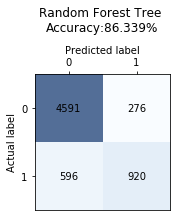

In [55]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, predict_rf_y)

from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_rf, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Random Forest Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_rf_y)))
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,
            s=cm_rf[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_matrix_Random_Forest_tree.png')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error
print("Mean squared error Random Forest: {0:.3%} ".format(mean_squared_error(test_y, predict_rf_y)))
rootMeanSquaredError_rf= sqrt(mean_squared_error(test_y, predict_rf_y))
print ("Root mean squared error Random Forest: {0:.3%} ".format(rootMeanSquaredError_rf/10))

Mean squared error Random Forest: 13.661% 
Root mean squared error Random Forest: 3.696% 


In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_rf, tpr_rf, thresholds = roc_curve(test_y, predict_rf_y)

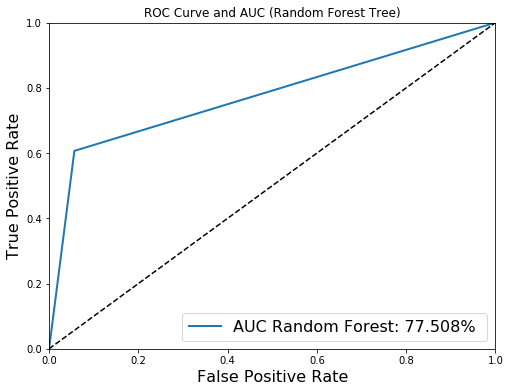

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_rf, tpr_rf, thresholds = roc_curve(test_y, predict_rf_y)

def plot_roc_curve(fpr_rf, tpr_rf, label=None):
    plt.plot(fpr_rf, tpr_rf, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve and AUC (Random Forest Tree)")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf)
plt.savefig('ROC_Curve_Random_Forest_tree.png')
plt.show()

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 1) marital.status                 0.242730
 2) capital.gain                   0.191198
 3) education.num                  0.151661
 4) relationship                   0.150086
 5) age                            0.096547
 6) occupation                     0.055596
 7) hours.per.week                 0.050390
 8) capital.loss                   0.046357
 9) sex                            0.008894
10) workclass                      0.006542


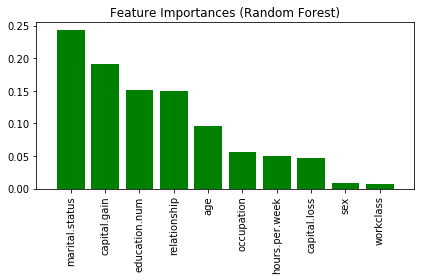

In [59]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = X.columns
forest = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=500, max_depth=8, n_jobs=-1)
forest.fit(train_X, train_y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30 , feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(train_X.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

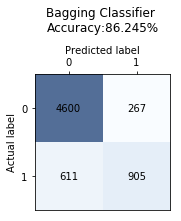

In [129]:
# Making the Confusion Matrix for RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm_bg = confusion_matrix(test_y, predict_bg_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_bg, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Bagging Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_bg_y)))
for i in range(cm_bg.shape[0]):
    for j in range(cm_bg.shape[1]):
        ax.text(x=j, y=i,
            s=cm_bg[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

### AdaBoost

In [58]:
# Training the AdaBoost model and fitting it to the train X and y
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0),random_state=0)
ada_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

In [59]:
predict_ada_y = ada_clf.predict(test_X)

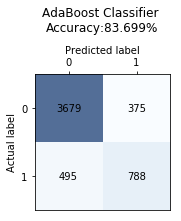

In [60]:
# Making the Confusion Matrix for AdaBoost
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(test_y, predict_ada_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_ada, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('AdaBoost Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_ada_y)))
for i in range(cm_ada.shape[0]):
    for j in range(cm_ada.shape[1]):
        ax.text(x=j, y=i,
            s=cm_ada[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

##### Naive Bayes Classification

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(train_X, train_y)
print(BernNB)

In [ ]:
predict_bernNB = BernNB.predict(test_X)
print (accuracy_score(test_y, predict_bernNB))

In [ ]:
predict_bernNB = BernNB.predict(test_X)

In [ ]:
#print(predict_bernNB.tolist())

In [ ]:
sns.countplot(predict_bernNB)
plt.plot(0, label ="0.0 = <= 50K")
plt.plot(1, label ="1.0 = > 50K")
plt.xlabel("Income")
plt.ylabel("count")
plt.title("Naive Bayes Prediction\n Frequency")
plt.legend()
plt.savefig('Income_vrs_Count_Naive_Bayes_Prediction.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm_BernNB = confusion_matrix(test_y, predict_bernNB)

In [ ]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_BernNB, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Naive Bayes - BernNB \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_bernNB)))
for i in range(cm_BernNB.shape[0]):
    for j in range(cm_BernNB.shape[1]):
        ax.text(x=j, y=i,
            s=cm_BernNB[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_Naive Bayes-BernNB.png')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Naive Bayes: {0:.3%} ".format(precision_score(test_y, predict_bernNB)))
print ("Recall Naive Bayes:    {0:.3%} ".format(recall_score(test_y, predict_bernNB)))
print("F1-ScoreNaive Bayes:  {0:.3%} ".format(f1_score(test_y, predict_bernNB)))

In [ ]:
multiNB = MultinomialNB()
multiNB.fit(train_X, train_y)
print(multiNB)

In [ ]:
predict_multi = multiNB.predict(test_X)

In [ ]:
print(accuracy_score(test_y, predict_multi))

In [ ]:
GausNB = GaussianNB()
GausNB.fit(train_X, train_y)
print(GausNB)

In [ ]:
predict_gaus = GausNB.predict(test_X)
print(accuracy_score(test_y, predict_gaus))

## K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
X = preprocessing.scale(X)

In [ ]:
clf_neigh = neighbors.KNeighborsClassifier(n_neighbors=6)
clf_neigh = clf_neigh.fit(train_X, train_y)

In [ ]:
predict_neigh = clf_neigh.predict(test_X)
print (accuracy_score(test_y, predict_neigh))

In [ ]:
from sklearn.metrics import confusion_matrix
cm_neigh = confusion_matrix(test_y, predict_neigh)

from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_neigh, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('KNN \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_neigh)))
for i in range(cm_neigh.shape[0]):
    for j in range(cm_neigh.shape[1]):
        ax.text(x=j, y=i,
            s=cm_neigh[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_matrix_KNN.png')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision KNN: {0:.3%} ".format(precision_score(test_y, predict_neigh)))
print ("Recall KNN:    {0:.3%} ".format(recall_score(test_y, predict_neigh)))
print("F1-Score KNN:  {0:.3%} ".format(f1_score(test_y, predict_neigh)))

In [ ]:
#Mean square error K Nearest Neigbour
from sklearn.metrics import mean_squared_error
print("Mean squared error KNN:        {0:.3%} ".format(mean_squared_error(test_y, predict_neigh)))
rootMeanSquaredError_nei  = sqrt(mean_squared_error(test_y, predict_neigh))
print ("Root mean squared error KNN :  {0:.3%} ".format(rootMeanSquaredError_nei/10))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_neigh, tpr_neigh, thresholds = roc_curve(test_y, predict_neigh)

def plot_roc_curve(fpr_neigh, tpr_neigh, label=None):
    plt.plot(fpr_rf, tpr_rf, linewidth=2, label="AUC KNN: {0:.3%} ".format(roc_auc_score(test_y, predict_neigh)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve and AUC (K Nearest Neighbor)")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_neigh, tpr_neigh)
plt.savefig('ROC_Curve_K_Nearest_Neighbor.png')
plt.show()

## Plot ROC Curves together with AUC

In [ ]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(8,6))
plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree Classifier: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="AUC KNN: {0:.3%} ".format(roc_auc_score(test_y, predict_neigh)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()